In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from numpy import asarray

In [3]:
import os
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from keras.models import Sequential, load_model
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [5]:
train_path = "D:/Gundu/DeepLearning_Projects/Dog-Cat_Classification/train/Training data/"
test_path = "D:/Gundu/DeepLearning_Projects/Dog-Cat_Classification/train/Test data/"
# path = "D:/Gundu/DeepLearning_Projects/Dog-Cat_Classification/train"

In [6]:
classes = os.listdir(train_path) 
# classes

In [7]:
t = Image.open(train_path+classes[0])
t1 = t.resize((5,5))
t2 = asarray(t1)
t2

array([[[149, 155, 152],
        [146, 138, 130],
        [141, 120, 106],
        [137, 117, 106],
        [142, 122, 109]],

       [[120, 124, 120],
        [118, 111, 101],
        [145, 123, 106],
        [125,  98,  81],
        [112,  88,  69]],

       [[ 79,  78,  68],
        [ 72,  66,  52],
        [121, 104,  88],
        [ 95,  79,  61],
        [ 94,  79,  59]],

       [[116, 111,  98],
        [130, 125, 116],
        [155, 149, 138],
        [164, 160, 149],
        [155, 151, 139]],

       [[174, 167, 161],
        [186, 181, 178],
        [199, 199, 199],
        [203, 204, 207],
        [201, 204, 208]]], dtype=uint8)

In [8]:
train_path+classes[0]

'D:/Gundu/DeepLearning_Projects/Dog-Cat_Classification/train/Training data/cat_10.jpg'

In [9]:
train_images = np.array([])
train_labels = np.array([])
list_ = []
list_2 = []
# train_images = asarray(train_images)
# idx=0
for i in classes:
    if i[:3]=="cat":
        list_2.append([0])
    else:
        list_2.append([1])
    img = Image.open(train_path + i)
    img = img.resize((32,32))
    data = asarray(img)
    # print(data.shape)
    list_.append(data)

In [10]:
list_[0].shape

(32, 32, 3)

In [78]:
# Converting images list into numpy array
train_images = np.array(list_)

In [79]:
# Converting labels list into numpy array
train_labels = np.array(list_2)
# train_labels

In [80]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images,train_labels)

In [81]:
dump_train_lables = np.array([])
dump_train_lables = train_labels

In [82]:
train_labels = train_labels.reshape(-1)

In [83]:
type(train_images)

numpy.ndarray

In [84]:
train_images.shape

(556, 32, 32, 3)

In [85]:
test_classes = os.listdir(test_path) 

In [86]:
catagories = ['cat','dog']

In [87]:
test_images = np.array([])
test_labels = np.array([])
test_img_list = []
test_label_list = []
# train_images = asarray(train_images)
# idx=0
for i in test_classes:
    if i[:3]=="cat":
        test_label_list.append([0])
    else:
        test_label_list.append([1])
    img = Image.open(test_path + i)
    img = img.resize((32,32))
    data = asarray(img)
    # print(data.shape)
    test_img_list.append(data)

In [88]:
test_images = np.array(test_img_list)
test_labels = np.array(test_label_list)

In [89]:
test_images, test_labels = shuffle(test_images,test_labels)

In [90]:
test_labels = test_labels.reshape(-1)

In [91]:
test_images.shape

(140, 32, 32, 3)

In [92]:
train_images,test_images = train_images/255.0,test_images/255.0

In [93]:
train_images

array([[[[0.30980392, 0.30196078, 0.32156863],
         [0.22352941, 0.21960784, 0.23529412],
         [0.25490196, 0.25098039, 0.2627451 ],
         ...,
         [0.1372549 , 0.14117647, 0.14901961],
         [0.16862745, 0.16862745, 0.18823529],
         [0.1372549 , 0.1372549 , 0.14509804]],

        [[0.4       , 0.4       , 0.43921569],
         [0.36470588, 0.36862745, 0.41176471],
         [0.34117647, 0.35294118, 0.39215686],
         ...,
         [0.20784314, 0.20784314, 0.22745098],
         [0.22352941, 0.21960784, 0.23921569],
         [0.16862745, 0.16470588, 0.18431373]],

        [[0.31764706, 0.31764706, 0.34117647],
         [0.19215686, 0.20392157, 0.23137255],
         [0.14509804, 0.16470588, 0.19215686],
         ...,
         [0.25882353, 0.25882353, 0.28627451],
         [0.27843137, 0.27843137, 0.30588235],
         [0.26666667, 0.26666667, 0.30196078]],

        ...,

        [[0.56862745, 0.55686275, 0.51764706],
         [0.55686275, 0.55686275, 0.54117647]

In [94]:
# img = load_img(train_path + "cat_9.jpg")
# plt.imshow(img)
# plt.axis("on")
# plt.show()

In [95]:
# plt.figure()
# plt.imshow(train_images[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [96]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(catagories[y[index]])


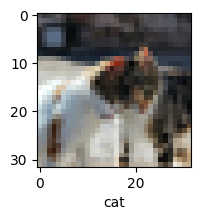

In [97]:
plot_sample(train_images,train_labels,0)

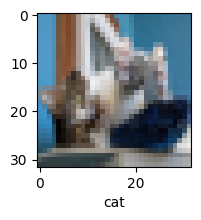

In [98]:
plot_sample(train_images,train_labels,8)

In [99]:
# dump_train_lables

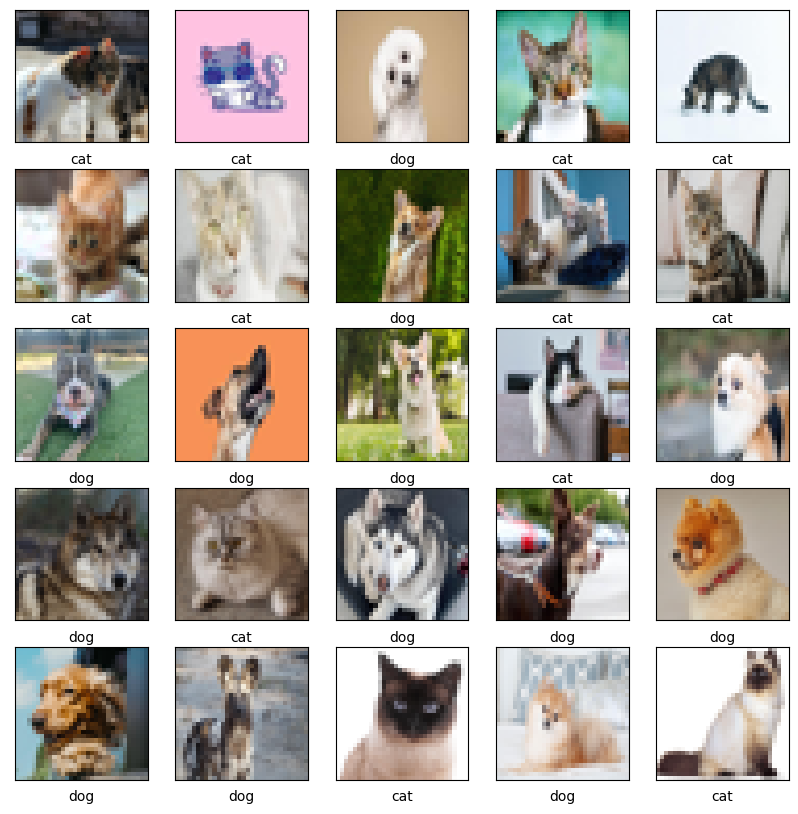

In [100]:
class_names = ['cat','dog']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[dump_train_lables[i][0]])
plt.show()

In [140]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
# model.add(Conv2D(32,(3,3),activation='softmax'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='softmax'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))

In [141]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [142]:
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
# model.add(layers.Dense(2,activation='softmax'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [143]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 2, 2, 128)        

In [144]:
import tensorflow as tf

In [145]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

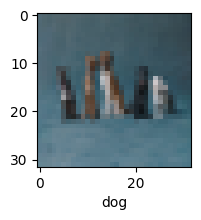

In [146]:
plot_sample(test_images,test_labels,45)

In [147]:
# Train the model
history = model.fit(train_images,train_labels,epochs=50,validation_data=(test_images,test_labels)
                    )

Epoch 1/50
18/18 [==============================] - 3s 46ms/step - loss: 0.6944 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 1s 30ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 1s 32ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 1s 50ms/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 1s 45ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 1s 35ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 1s 30ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
18

In [109]:
import matplotlib.pyplot as plt

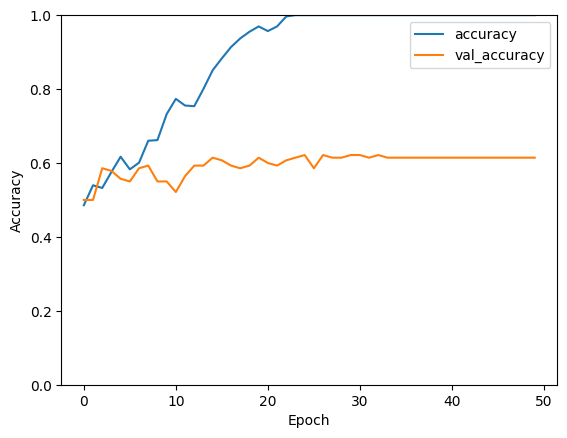

In [110]:
plt.plot(history.history['accuracy'],label ='accuracy')
plt.plot(history.history['val_accuracy'],label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='upper right')

In [111]:
from sklearn.metrics import accuracy_score, classification_report

In [112]:
test_acc = model.evaluate(test_images,test_labels,verbose=2)

5/5 - 0s - loss: 2.2754 - accuracy: 0.6143 - 115ms/epoch - 23ms/step


In [113]:
print(test_acc)

[2.2754104137420654, 0.6142857074737549]


In [114]:
pred_values = model.predict(test_images)

5/5 [==============================] - 0s 12ms/step


In [115]:
pred_values[:5]

array([[1.02655925e-01, 8.97344112e-01],
       [1.10957719e-01, 8.89042258e-01],
       [9.99998569e-01, 1.42673696e-06],
       [9.60888445e-01, 3.91115509e-02],
       [9.99902964e-01, 9.69816756e-05]], dtype=float32)

In [116]:
pred_classes = [np.argmax(e) for e in pred_values]

In [117]:
print(classification_report(test_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        70
           1       0.63      0.54      0.58        70

    accuracy                           0.61       140
   macro avg       0.62      0.61      0.61       140
weighted avg       0.62      0.61      0.61       140



In [118]:
test_labels[:5]

array([1, 1, 0, 1, 1])

In [119]:
pred_classes[:5]

[1, 1, 0, 0, 0]

In [120]:
pred_classes[130:]

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

In [121]:
test_labels[130:]

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [122]:
# train_labels = train_labels.reshape(-1)

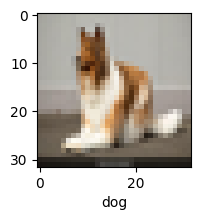

In [123]:
# Actual Value
plot_sample(test_images,test_labels,1)

In [124]:
catagories[pred_classes[1]]

'dog'

In [125]:
yhat = model.predict(train_images)

18/18 [==============================] - 0s 12ms/step


In [126]:
yhat

array([[9.98919368e-01, 1.08062336e-03],
       [9.99999881e-01, 1.46579509e-07],
       [5.02123403e-05, 9.99949813e-01],
       ...,
       [9.95902717e-01, 4.09727590e-03],
       [9.99883175e-01, 1.16864845e-04],
       [3.87983077e-04, 9.99612033e-01]], dtype=float32)

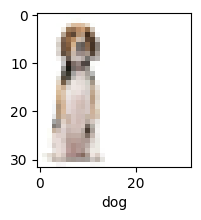

In [127]:
plot_sample(train_images,train_labels,300)

In [128]:
train_pred_classes = [np.argmax(e) for e in yhat]

In [129]:
catagories[train_pred_classes[300]]

'dog'

In [130]:
# keras_file="Model.h5"
# tf.keras.models.save_model(model,keras_file)

In [ ]:

#create new file test.py and run this file
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# import numpy as np
# load saved model

model1 = load_model("Model.h5")
# model1.evaluate(test_images,test_labels)

img_path = "cat_5.jpg"
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
preds=model1.predict(x)
# # create a list containing the class labels
class_labels = ['cat','dog']
# # find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print(pred)
# # print the label of the class with maximum score
print(class_labels[pred[0]])

1/1 [==============================] - 0s 155ms/step
cat
